Epoch 1 | D Loss: 1.0015 (Acc: 0.191) | G Loss: 0.8609
Epoch 100 | D Loss: 0.6149 (Acc: 0.734) | G Loss: 1.5393
Epoch 200 | D Loss: 0.4536 (Acc: 0.804) | G Loss: 1.6291
Epoch 300 | D Loss: 0.4071 (Acc: 0.854) | G Loss: 1.3946
Epoch 400 | D Loss: 0.3678 (Acc: 0.884) | G Loss: 1.3398
Epoch 500 | D Loss: 0.3419 (Acc: 0.899) | G Loss: 1.3020
Epoch 600 | D Loss: 0.3240 (Acc: 0.915) | G Loss: 1.2728
Epoch 700 | D Loss: 0.3098 (Acc: 0.927) | G Loss: 1.2537
Epoch 800 | D Loss: 0.2970 (Acc: 0.936) | G Loss: 1.2488
Epoch 900 | D Loss: 0.2864 (Acc: 0.942) | G Loss: 1.2531
Epoch 1000 | D Loss: 0.2765 (Acc: 0.947) | G Loss: 1.2723
Epoch 1100 | D Loss: 0.2673 (Acc: 0.952) | G Loss: 1.2977
Epoch 1200 | D Loss: 0.2584 (Acc: 0.955) | G Loss: 1.3198
Epoch 1300 | D Loss: 0.2502 (Acc: 0.959) | G Loss: 1.3382
Epoch 1400 | D Loss: 0.2429 (Acc: 0.961) | G Loss: 1.3604
Epoch 1500 | D Loss: 0.2360 (Acc: 0.964) | G Loss: 1.3881
Epoch 1600 | D Loss: 0.2296 (Acc: 0.966) | G Loss: 1.4128
Epoch 1700 | D Loss: 0.223

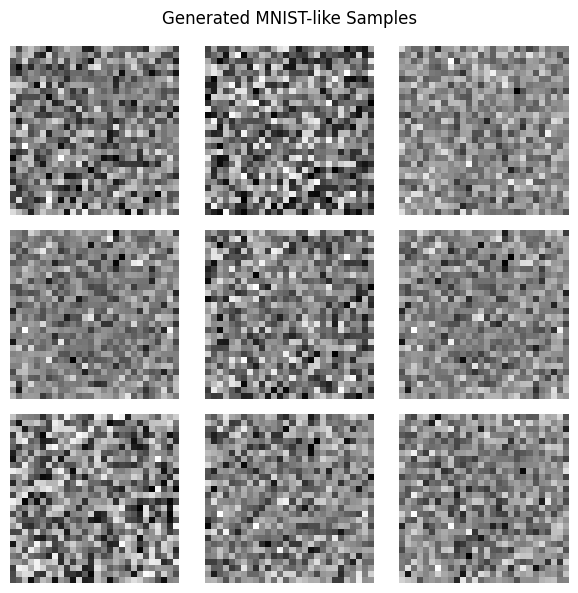

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers


import matplotlib.pyplot as plt


np.random.seed(42)
tf.random.set_seed(42)


(x_train, _), _ = tf.keras.datasets.mnist.load_data()


x_train = x_train.reshape(-1, 28 * 28).astype("float32")


x_train = (x_train / 127.5) - 1.0


def make_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_dim=100),
        layers.Dense(784, activation="tanh")
    ], name="generator")
    return model

def make_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_dim=784),
        layers.Dense(1, activation="sigmoid")
    ], name="discriminator")
    # Compile as specified
    model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
    return model


generator = make_generator()
discriminator = make_discriminator()


discriminator.trainable = False


noise_input = layers.Input(shape=(100,))

fake_image = generator(noise_input)

gan_output = discriminator(fake_image)

gan = tf.keras.Model(noise_input, gan_output, name="GAN")
gan.compile(loss="binary_crossentropy", optimizer="adam")


discriminator.trainable = True


epochs = 2000        
batch_size = 128
print_interval = 100  

num_batches = x_train.shape[0] // batch_size

for epoch in range(1, epochs + 1):
    
    
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    
    noise = np.random.normal(0, 1, (batch_size, 100)).astype("float32")
    gen_imgs = generator.predict(noise, verbose=0)

    real_y = np.ones((batch_size, 1), dtype="float32")
    fake_y = np.zeros((batch_size, 1), dtype="float32")

    
    d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake_y)

   
    d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])

  
    noise = np.random.normal(0, 1, (batch_size, 100)).astype("float32")
    valid_y = np.ones((batch_size, 1), dtype="float32")

    g_loss = gan.train_on_batch(noise, valid_y)

    if epoch % print_interval == 0 or epoch == 1:
       
        d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1])
        print(f"Epoch {epoch} | D Loss: {d_loss:.4f} (Acc: {d_acc:.3f}) | G Loss: {g_loss:.4f}")


n = 9
noise = np.random.normal(0, 1, (n, 100)).astype("float32")
gen_imgs = generator.predict(noise, verbose=0)


gen_imgs = (gen_imgs.reshape(-1, 28, 28) + 1.0) / 2.0

plt.figure(figsize=(6, 6))
for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(gen_imgs[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Generated MNIST-like Samples")
plt.tight_layout()
plt.show()
